<a href="https://colab.research.google.com/github/vaibhav251999/EDA-capstone-project/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:

#Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Almabetter/capstone projects/EDA/Airbnb NYC 2019.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
col=[col for col in df.columns if df[col].isna().sum()!=0]
print("columns having null values",col)

columns having null values ['name', 'host_name', 'last_review', 'reviews_per_month']


Lets check out the columns having **null values**

In [ ]:
df.loc[:,df.isna().sum()!=0]

,name,host_name,last_review,reviews_per_month
0,Clean & quiet apt home by the park,John,2018-10-19,0.21
1,Skylit Midtown Castle,Jennifer,2019-05-21,0.38
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,NaN,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,2019-07-05,4.64
4,Entire Apt: Spacious Studio/Loft by central park,Laura,2018-11-19,0.10
...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,NaN,NaN
48891,Affordable room in Bushwick/East Williamsburg,Marisol,NaN,NaN
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,NaN,NaN
48893,43rd St. Time Square-cozy single bed,Taz,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.fillna({'reviews_per_month':0},inplace=True)

In [ ]:
df['host_name'].value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

In [ ]:
df["host_id"].value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64

**From this we can see that host name Michael its appearing 417 times in the host_name column , so this might imply that michael is having heighest number of rooms , but from the host_id column its showing heighest appearance of any host_id is 327 , so this clearly implies that there can be multiple person may have same name thats why we are getting different heighest apperance in host_name as compared to host_id**


    
     
      
       
        
         
          

  

**lets check which host_name is actually having heighest number of appartments**

In [ ]:
df[df['host_id']==219517861]['host_name'].unique()

array(['Sonder (NYC)'], dtype=object)

So **Sonder (NYC)** is having maximum numbers of rooms for the guest, For Airbnb he might be very important person then.

In [ ]:
df_sonder=df[df['host_name']=='Sonder (NYC)']
df_sonder[['host_name','neighbourhood_group','neighbourhood','latitude','longitude']].head(6)

,host_name,neighbourhood_group,neighbourhood,latitude,longitude
38293,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645
38294,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641
38588,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443
39769,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614
39770,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528
39771,Sonder (NYC),Manhattan,Murray Hill,40.74845,-73.97446


**so Sonder (NYC) is having multiple appartments in same building in different different neighbourhood**

**Lets check top 5 host_name, respective neighborhood ,and neighbourhood group is having heighest number of reviews**

In [ ]:
df[['host_name','number_of_reviews','neighbourhood_group','neighbourhood']].sort_values(by='number_of_reviews',ascending=False)[:5]

,host_name,number_of_reviews,neighbourhood_group,neighbourhood
11759,Dona,629,Queens,Jamaica
2031,Jj,607,Manhattan,Harlem
2030,Jj,597,Manhattan,Harlem
2015,Jj,594,Manhattan,Harlem
13495,Dona,576,Queens,Jamaica


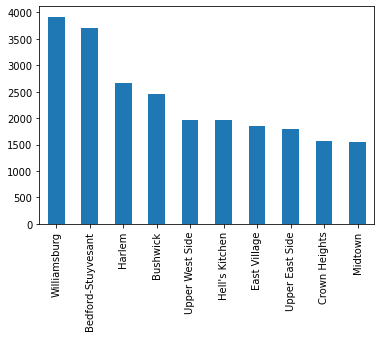

In [ ]:
# plotting top 10 neighbourhood which are having maximum number of appartments for airbnb in the respective neighbourhood

pd.value_counts(df['neighbourhood'])[:10].plot.bar()


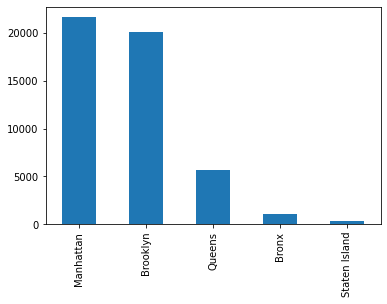

In [ ]:
pd.value_counts(df['neighbourhood_group']).plot.bar()

In [ ]:
# top 3 neighbourhood in thier respective neibhorhood group which are having maximum prices
df_manhattan=df[df['neighbourhood_group']=='Manhattan']
df_queens=df[df['neighbourhood_group']=='Queens']
df_brooklyn=df[df['neighbourhood_group']=='Brooklyn']
df_bronx=df[df['neighbourhood_group']=='Bronx']
df_staten=df[df['neighbourhood_group']=='staten Island']

# top 3 neighbourhood in Manhattan which are having maximum prices 
print('Top 3 neighbourhood in Manhattan which are having maximum prices ')
df_manhattan.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).head(3)

Top 3 neighbourhood in Manhattan which are having maximum prices 


neighbourhood
Upper West Side    10000
East Harlem         9999
Lower East Side     9999
Name: price, dtype: int64

In [ ]:
# top 3 neighbourhood in Staten Island which are having maximum prices 
print('Top 3 neighbourhood in Staten Island which are having maximum prices')
df_staten.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).head(3)

Top 3 neighbourhood in Staten Island which are having maximum prices


Series([], Name: price, dtype: int64)

In [ ]:
# top 3 neighbourhood in bronx which are having maximum prices 
print('Top 3 neighbourhood in bronx which are having maximum prices')
df_bronx.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).head(3)

Top 3 neighbourhood in bronx which are having maximum prices


neighbourhood
Riverdale      2500
City Island    1000
Longwood        680
Name: price, dtype: int64

In [ ]:
# top 3 neighbourhood in Queens which are having maximum prices 
print('Top 3 neighbourhood in Queenswhich are having maximum prices')
df_queens.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).head(3)

Top 3 neighbourhood in Queenswhich are having maximum prices


neighbourhood
Astoria         10000
Bayside          2600
Forest Hills     2350
Name: price, dtype: int64

In [ ]:
# top 3 neighbourhood in brooklyn which are having maximum prices 
print('Top 3 neighbourhood in brooklyn which are having maximum prices')
df_brooklyn.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).head(3)

Top 3 neighbourhood in brooklyn which are having maximum prices


neighbourhood
Greenpoint       10000
Clinton Hill      8000
East Flatbush     7500
Name: price, dtype: int64

In [ ]:
df.groupby(['neighbourhood_group','neighbourhood'])['reviews_per_month'].max().sort_values(ascending=False).head(5)

neighbourhood_group  neighbourhood      
Manhattan            Theater District       58.50
Queens               Rosedale               20.94
                     Springfield Gardens    19.75
                     East Elmhurst          16.22
                     Jamaica                15.32
Name: reviews_per_month, dtype: float64

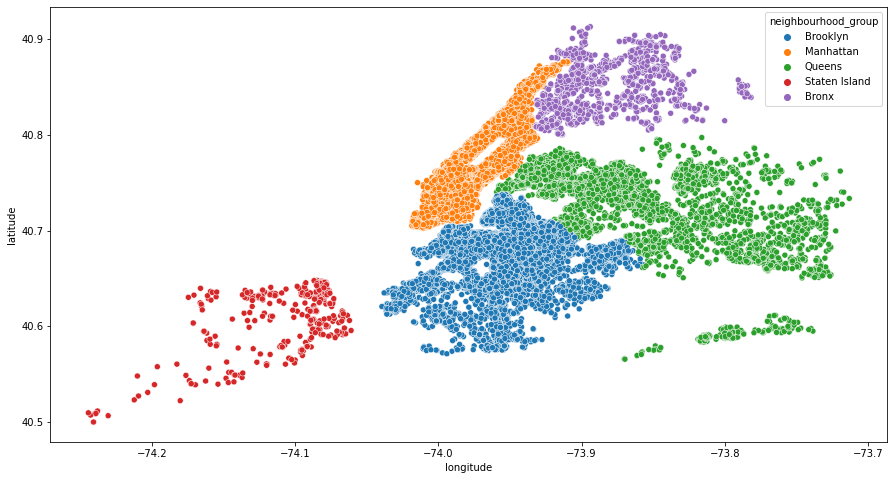

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['longitude'],y=df['latitude'], hue=df['neighbourhood_group'])
plt.show()

### **now lets check the room type** 

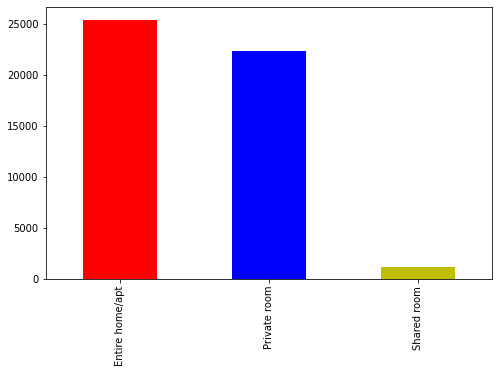

In [ ]:
plt.figure(figsize=(8,5))
df['room_type'].value_counts().plot(kind='bar',color=['r','b','y'])